# Project: Fifa 21 Players Data Analysis and Visualization

## Project Description

Welcome to this data analysis and visualization project! In this project, we will be exploring the 'FIFA 21 Players' dataset which comprises a rich variety of information about soccer players from around the world. The data extracted are in 'csv' file format.

Your task is to clean and prepare the data for analysis, and then leverage your data visualization skills to uncovers insights about FIFA 21 players, teams, and overall value and wage dynamics.

Here are your tasks outlined in detail:

1. **Data Cleaning**: The initial dataset contains some unnecessary and redundant information. Your first task is to clean and prepare it for analysis. In doing so:

- Remove the 'Unnamed: 0' column from the dataset.

- Removing the Newline Characters.

- Look for columns which contain star ('★') characters. Remove these characters from all such columns.

- Fill in the missing values using an appropriate method.

- In the 'Value', 'Wage', and 'Release Clause' columns, remove the '€', 'K', and 'M' characters and convert the currency value to 'int'. For eg, "M" in value column is Million, so multiply the row values by 1,000,000, etc.

  
2. **Data Visualization**: After the data has been cleaned and prepared, use appropriate data visualization methods to represent the data as follows:

- Create a Pie Chart to display the preferred foot ('Left' or 'Right') among the FIFA 21 players.
- Use a Bar Plot to represent the top 3 FIFA 21 players.
- Visualize the best FIFA teams from 100 players based on the 'OVA' score using a Bar Plot.
- Use a Bar Plot to display the top 10 most valuable FIFA teams.
- Create a Scatter Plot to show players who are highly valuable but still underpaid.
  
Ensure all plots are fully labeled with titles, x and y variables, and a legend if necessary.

### import package

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


### Read File

In [2]:
url = 'https://storage.googleapis.com/rg-ai-bootcamp/assignment-1/fifa21_raw_data.csv'
fifa_df = pd.read_csv(url, low_memory=False)
fifa_df

,Unnamed: 0,ID,Name,LongName,Nationality,Age,↓OVA,POT,Club,Contract,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,0,158023,L. Messi,Lionel Messi,Argentina,33,93,93,\n\n\n\nFC Barcelona,2004 ~ 2021,...,Medium,Low,5 ★,85,92,91,95,38,65,771
1,1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,Portugal,35,92,92,\n\n\n\nJuventus,2018 ~ 2022,...,High,Low,5 ★,89,93,81,89,35,77,562
2,2,200389,J. Oblak,Jan Oblak,Slovenia,27,91,93,\n\n\n\nAtlético Madrid,2014 ~ 2023,...,Medium,Medium,3 ★,87,92,78,90,52,90,150
3,3,192985,K. De Bruyne,Kevin De Bruyne,Belgium,29,91,91,\n\n\n\nManchester City,2015 ~ 2023,...,High,High,4 ★,76,86,93,88,64,78,207
4,4,190871,Neymar Jr,Neymar da Silva Santos Jr.,Brazil,28,91,91,\n\n\n\nParis Saint-Germain,2017 ~ 2022,...,High,Medium,5 ★,91,85,86,94,36,59,595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18974,18974,247223,Xia Ao,Ao Xia,China PR,21,47,55,\n\n\n\nWuhan Zall,2018 ~ 2022,...,Medium,Medium,1 ★,64,28,26,38,48,51,NaN
18975,18975,258760,B. Hough,Ben Hough,England,17,47,67,\n\n\n\nOldham Athletic,2020 ~ 2021,...,Medium,Medium,1 ★,64,40,48,49,35,45,NaN
18976,18976,252757,R. McKinley,Ronan McKinley,England,18,47,65,\n\n\n\nDerry City,2019 ~ 2020,...,Medium,Medium,1 ★,63,39,44,46,40,53,NaN
18977,18977,243790,Wang Zhen'ao,Zhen'ao Wang,China PR,20,47,57,\n\n\n\nDalian YiFang FC,2020 ~ 2022,...,Medium,Medium,1 ★,58,49,41,49,30,44,NaN


### Data Cleaning

In [3]:
# understanding structure of fifa_df dataset
fifa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 35 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      18979 non-null  int64 
 1   ID              18979 non-null  int64 
 2   Name            18979 non-null  object
 3   LongName        18979 non-null  object
 4   Nationality     18979 non-null  object
 5   Age             18979 non-null  int64 
 6   ↓OVA            18979 non-null  int64 
 7   POT             18979 non-null  int64 
 8   Club            18979 non-null  object
 9   Contract        18979 non-null  object
 10  Positions       18979 non-null  object
 11  Height          18979 non-null  object
 12  Weight          18979 non-null  object
 13  Preferred Foot  18979 non-null  object
 14  BOV             18979 non-null  int64 
 15  Best Position   18979 non-null  object
 16  Joined          18979 non-null  object
 17  Loan Date End   1013 non-null   object
 18  Value 

**Removing the Unnamed: 0 Column**

In [4]:
# removing the 'Unnamed: 0' Column
fifa_df = fifa_df.drop(columns=['Unnamed: 0'])

In [5]:
print(fifa_df.head())

       ID               Name                      LongName Nationality  Age  \
0  158023           L. Messi                  Lionel Messi   Argentina   33   
1   20801  Cristiano Ronaldo  C. Ronaldo dos Santos Aveiro    Portugal   35   
2  200389           J. Oblak                     Jan Oblak    Slovenia   27   
3  192985       K. De Bruyne               Kevin De Bruyne     Belgium   29   
4  190871          Neymar Jr    Neymar da Silva Santos Jr.      Brazil   28   

   ↓OVA  POT                         Club     Contract   Positions  ...  \
0    93   93         \n\n\n\nFC Barcelona  2004 ~ 2021  RW, ST, CF  ...   
1    92   92             \n\n\n\nJuventus  2018 ~ 2022      ST, LW  ...   
2    91   93      \n\n\n\nAtlético Madrid  2014 ~ 2023          GK  ...   
3    91   91      \n\n\n\nManchester City  2015 ~ 2023     CAM, CM  ...   
4    91   91  \n\n\n\nParis Saint-Germain  2017 ~ 2022     LW, CAM  ...   

      A/W     D/W   IR  PAC SHO PAS DRI DEF PHY Hits  
0  Medium     Low  

**Removing the newline characters**

In [6]:
# detect which columns in the fifa_df dataset that contains newline characters
for column in fifa_df.columns:
    if fifa_df[column].astype(str).str.contains('\n').any():
        print(f'Kolom "{column}" mengandung character newline')

Kolom "Club" mengandung character newline


In [7]:
print(fifa_df['Club'])

0               \n\n\n\nFC Barcelona
1                   \n\n\n\nJuventus
2            \n\n\n\nAtlético Madrid
3            \n\n\n\nManchester City
4        \n\n\n\nParis Saint-Germain
                    ...             
18974             \n\n\n\nWuhan Zall
18975        \n\n\n\nOldham Athletic
18976             \n\n\n\nDerry City
18977       \n\n\n\nDalian YiFang FC
18978       \n\n\n\nDalian YiFang FC
Name: Club, Length: 18979, dtype: object


In [8]:
# remove newline characters
fifa_df['Club'] = fifa_df['Club'].str.replace('\n','',regex=False)
print(fifa_df['Club'])

0               FC Barcelona
1                   Juventus
2            Atlético Madrid
3            Manchester City
4        Paris Saint-Germain
                ...         
18974             Wuhan Zall
18975        Oldham Athletic
18976             Derry City
18977       Dalian YiFang FC
18978       Dalian YiFang FC
Name: Club, Length: 18979, dtype: object


**Removing 'Star' Characters**

In [9]:
# identify the columns that contain the star
star_columns = [col for col in fifa_df.columns if fifa_df[col].astype(str).str.contains('★').any()]
print('Columns with star characters: ', star_columns)

Columns with star characters:  ['W/F', 'SM', 'IR']


In [10]:
# so there are 3 columns that contains star characters
fifa_df[['W/F', 'SM', 'IR']].head()

,W/F,SM,IR
0,4 ★,4★,5 ★
1,4 ★,5★,5 ★
2,3 ★,1★,3 ★
3,5 ★,4★,4 ★
4,5 ★,5★,5 ★


In [11]:
# make a function to remove star characters
def remove_star(column):
    return column.str.replace('★','', regex=False)

# implementin the function to the dataset
for col in star_columns:
    fifa_df[col] = remove_star(fifa_df[col])

# checking the data
fifa_df[['W/F', 'SM', 'IR']].head()

,W/F,SM,IR
0,4,4,5
1,4,5,5
2,3,1,3
3,5,4,4
4,5,5,5


**Filling Missing Values**

In [12]:
# identify the missing value in the mentioned columns of fifa dataset
fifa_df.isnull().sum()

ID                    0
Name                  0
LongName              0
Nationality           0
Age                   0
↓OVA                  0
POT                   0
Club                  0
Contract              0
Positions             0
Height                0
Weight                0
Preferred Foot        0
BOV                   0
Best Position         0
Joined                0
Loan Date End     17966
Value                 0
Wage                  0
Release Clause        0
Total Stats           0
Base Stats            0
W/F                   0
SM                    0
A/W                   0
D/W                   0
IR                    0
PAC                   0
SHO                   0
PAS                   0
DRI                   0
DEF                   0
PHY                   0
Hits               2595
dtype: int64

In [13]:
# filling missing value with string
fifa_df = fifa_df.fillna({
    'Loan Date End' : 'Not on Loan',
    'Hits' : 'Unknown'
})

In [14]:
# checking
fifa_df[['Loan Date End','Hits']].tail()

,Loan Date End,Hits
18974,Not on Loan,Unknown
18975,Not on Loan,Unknown
18976,Not on Loan,Unknown
18977,Not on Loan,Unknown
18978,Not on Loan,Unknown


### Cleaning and Converting Financial Data

we'll focus on improving the readability and workability of the financial data within our dataset. We need identify the 'Value', 'Wage', and 'Release Clause' columns in the Fifa 21 Players dataset, which contain '€', 'K', and 'M' characters. 

In [15]:
# identify dataset that contain characters euro, K, M
fifa_df[['Value','Wage','Release Clause']].head()

,Value,Wage,Release Clause
0,€103.5M,€560K,€138.4M
1,€63M,€220K,€75.9M
2,€120M,€125K,€159.4M
3,€129M,€370K,€161M
4,€132M,€270K,€166.5M


In [16]:
# make function to convert data to numerik
def convert_to_numeric(value):
    value = value.replace('€','').strip()
    if 'K' in value:
        return int(float(value.replace('K','').replace(',',''))* 1_000)
    elif 'M' in value:
        return int(float(value.replace('M','').replace(',',''))* 1_000_000)
    else:
        return int(float(value.replace(',','')))

# implementing function to convert data to numeric 
fifa_df[['Value','Wage','Release Clause']] = fifa_df[['Value','Wage','Release Clause']].apply(lambda col: col.map(convert_to_numeric))

In [17]:
fifa_df[['Value','Wage','Release Clause']].head()

,Value,Wage,Release Clause
0,103500000,560000,138400000
1,63000000,220000,75900000
2,120000000,125000,159400000
3,129000000,370000,161000000
4,132000000,270000,166500000


In [18]:
fifa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              18979 non-null  int64 
 1   Name            18979 non-null  object
 2   LongName        18979 non-null  object
 3   Nationality     18979 non-null  object
 4   Age             18979 non-null  int64 
 5   ↓OVA            18979 non-null  int64 
 6   POT             18979 non-null  int64 
 7   Club            18979 non-null  object
 8   Contract        18979 non-null  object
 9   Positions       18979 non-null  object
 10  Height          18979 non-null  object
 11  Weight          18979 non-null  object
 12  Preferred Foot  18979 non-null  object
 13  BOV             18979 non-null  int64 
 14  Best Position   18979 non-null  object
 15  Joined          18979 non-null  object
 16  Loan Date End   18979 non-null  object
 17  Value           18979 non-null  int64 
 18  Wage  

### Data Visualization

**Pie Chart Visualization of FIFA 21 Players Preferred Foot**

In [19]:
# checking preferred foot 
fifa_df['Preferred Foot'].value_counts()

Preferred Foot
Right    14445
Left      4534
Name: count, dtype: int64

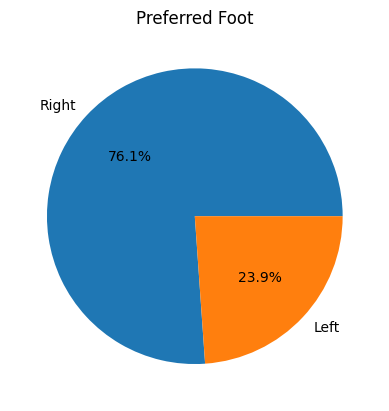

In [20]:
# make pie chart to show information about preferred foot 
preferred_foot_counts = fifa_df['Preferred Foot'].value_counts()
preferred_foot = preferred_foot_counts.index
counts = preferred_foot_counts.values 

plt.pie(counts, labels=preferred_foot, autopct='%1.1f%%', textprops={'color':'black'})
plt.title('Preferred Foot')
plt.savefig('preferred-foot.jpg',format='jpeg')  # save image
plt.show()

**Bar Plot Visualization of Top 6 FIFA 21 Players**

In [21]:
# rename column 
fifa_df.rename(columns={
    '↓OVA' : 'OVA'
}, inplace=True)

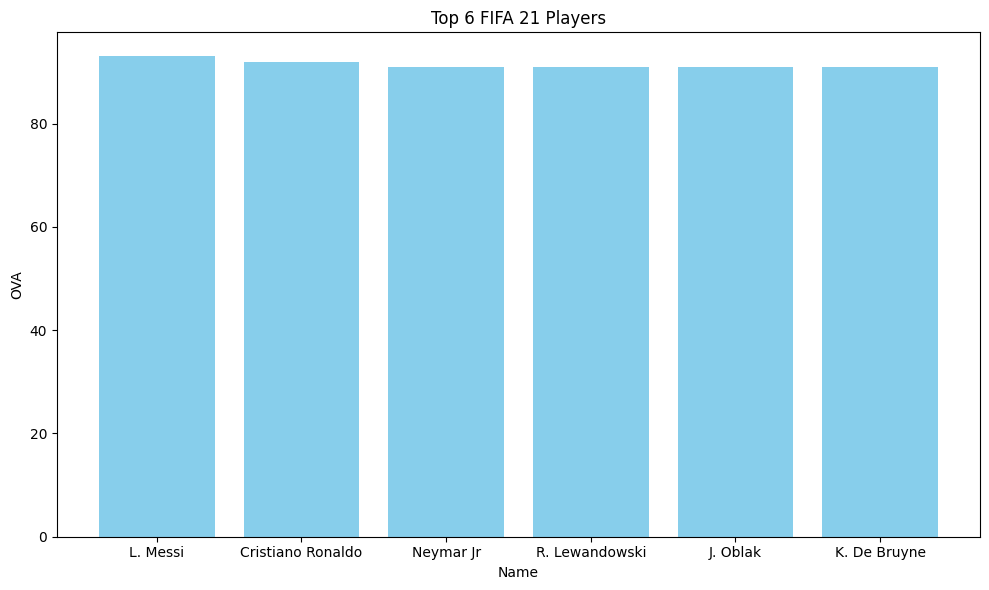

In [22]:
# sort by OVA score in descending order and take 6 top players
top_players = fifa_df[['Name','OVA']].sort_values(by='OVA', ascending=False).head(6)

name_players = top_players['Name'].tolist()
score_players = top_players['OVA'].tolist()

# make a bar chart
plt.figure(figsize=(10,6))
plt.bar(name_players, score_players, color='skyblue')
plt.xlabel('Name')
plt.ylabel('OVA')
plt.title('Top 6 FIFA 21 Players')
plt.tight_layout() # mengatur tata letak agar tidak terpotong
plt.savefig('top-6-players.jpg', format='jpeg')
plt.show()


**Bar Plot Visualization of Top 8 FIFA Teams with most numbers of Best Players**

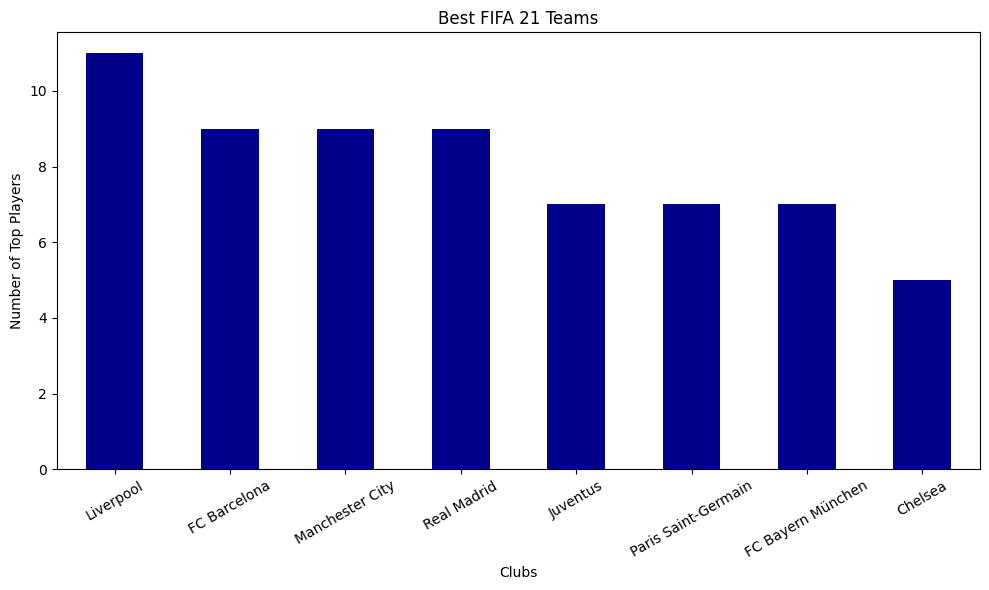

In [23]:
# sort players data based on OVA and take first 100 record 
top_100_players = fifa_df[['Name','OVA','Club']].sort_values(by='OVA', ascending=False).head(100)

# count frequency for each club based on top 100 players and take 8 top clubs
top_8_clubs = top_100_players['Club'].value_counts().head(8)

# make a bar plot for top 8 clubs
plt.figure(figsize=(10,6))
top_8_clubs.plot(kind='bar', color='darkblue')
plt.xlabel('Clubs')
plt.ylabel('Number of Top Players')
plt.title('Best FIFA 21 Teams')
plt.xticks(rotation=30)
plt.tight_layout()

plt.savefig('best-fifa-teams.jpg', format='jpeg')
plt.show()

**Bar Plot Visualization of Top 10 FIFA Teams with the most player in top 100 valuable**

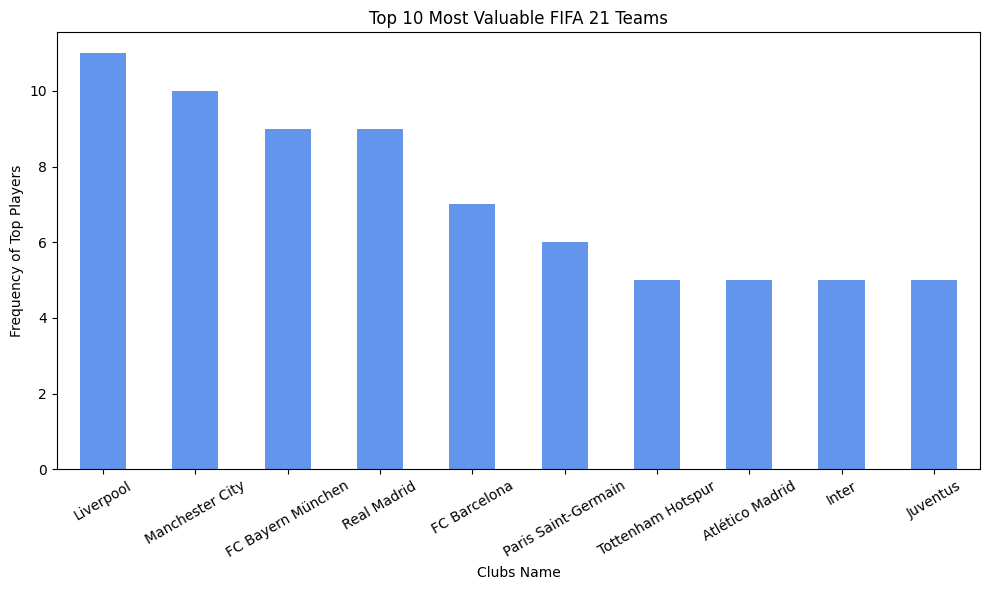

In [25]:
# sort players based on 'Value' column in descending order and take top 100 players with highest valuable 
valuable_players = fifa_df[['Name','Value','Club']].sort_values(by='Value', ascending=False).head(100)

# count frequency for each club based on top 100 players with highest value and take top 10 clubs 
top_10_clubs = valuable_players['Club'].value_counts().head(10)

# make bar plot for top 10 clubs 
plt.figure(figsize=(10,6))
top_10_clubs.plot(kind='bar', color='cornflowerblue')
plt.xlabel('Clubs Name')
plt.ylabel('Frequency of Top Players')
plt.title('Top 10 Most Valuable FIFA 21 Teams')
plt.xticks(rotation=30)
plt.tight_layout()
plt.savefig('most-valuable-teams.jpg', format='jpeg')
plt.show()

**Scatter Plot for Underpaid but Valuable Players**

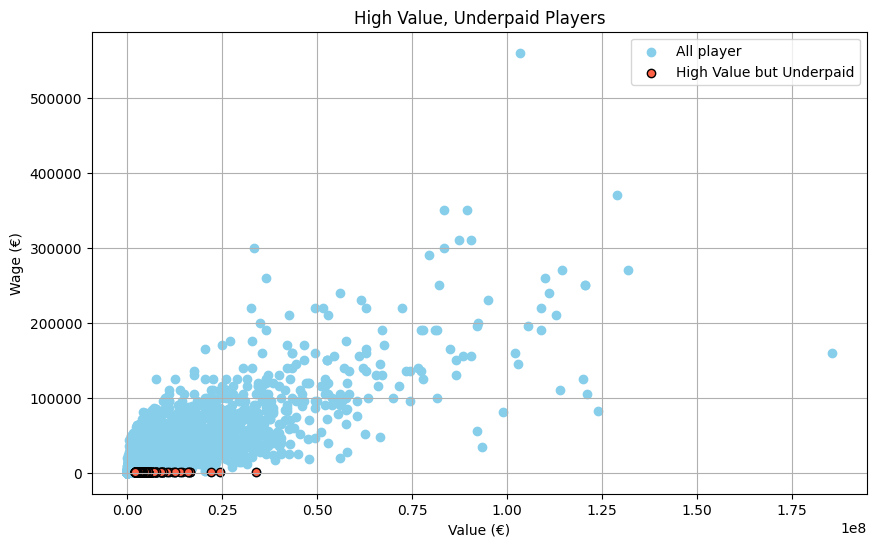

In [29]:
# add threshold for value and wage
value_threshold = fifa_df['Value'].quantile(0.75) # high value
wage_threshold = fifa_df['Wage'].quantile(0.25) # low wage

# identify the subset of players whi are considered high value but underpaid
high_value_underpaid = fifa_df[(fifa_df['Value'] >= value_threshold) &
                               (fifa_df['Wage'] <= wage_threshold)]

# make scatter plot
plt.figure(figsize=(10,6))

# plot all players
plt.scatter(fifa_df['Value'], fifa_df['Wage'], color='skyblue', label='All player')

# plot players with high value but underpaid
plt.scatter(high_value_underpaid['Value'], high_value_underpaid['Wage'], color='tomato', label='High Value but Underpaid', edgecolor='black')

# add label and title
plt.xlabel('Value (€)')
plt.ylabel('Wage (€)')
plt.title('High Value, Underpaid Players')
plt.legend()
plt.grid(True)

plt.savefig('high-value-underpaid-players.jpg', format='jpeg') # save image
plt.show()